## Pandasの基本例

このノートブックでは、Pandasの基本的な概念をいくつか紹介します。まずは、一般的なデータサイエンスライブラリのインポートから始めます。


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### シリーズ

シリーズは、リストや1次元配列のようなものですが、インデックスが付いています。すべての操作はインデックスに基づいて整列します。


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


シリーズのよくある使用例の一つが**時系列**です。時系列では、インデックスに特別な構造があり、通常は日付や日時の範囲を指します。このようなインデックスは`pd.date_range`を使って作成できます。

例えば、毎日購入された商品の量を示すシリーズがあり、毎週日曜日には自分用に1つ商品を取る必要があるとします。これをシリーズを使ってモデル化する方法は以下の通りです:


Length of index is 366


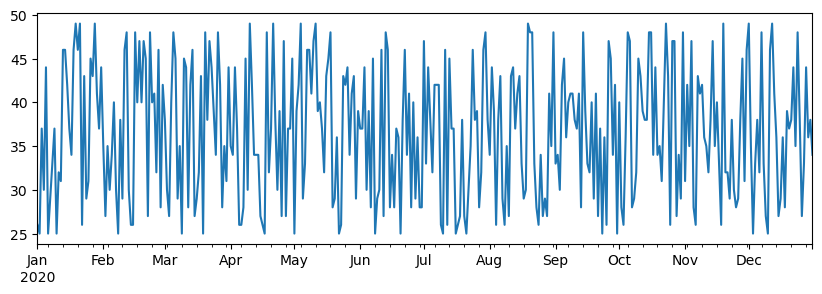

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


ご覧のとおり、ここでは問題が発生しています。週次シリーズでは言及されていない日が欠損値（`NaN`）と見なされ、数値に`NaN`を加えると`NaN`になります。正しい結果を得るためには、シリーズを加算する際に`fill_value`を指定する必要があります。


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


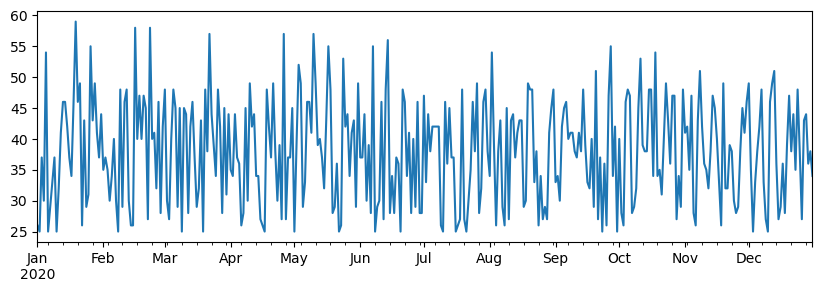

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

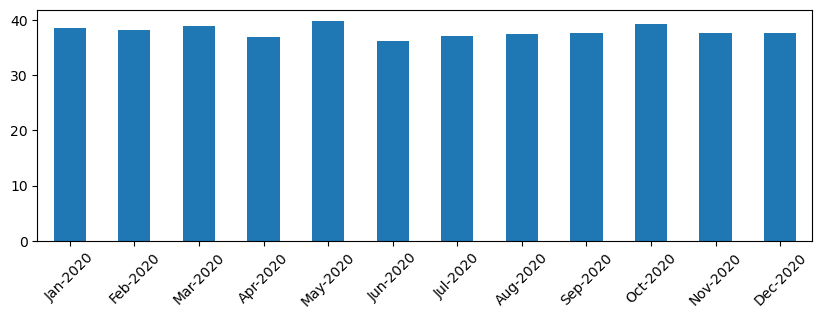

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## データフレーム

データフレームは、基本的に同じインデックスを持つ複数のシリーズの集合です。複数のシリーズを組み合わせてデータフレームを作成することができます。上記で定義された `a` と `b` のシリーズを使用すると:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

シリーズを列として使用し、辞書を使用して列名を指定することもできます。


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

同じ結果は、転置（その後、列の名前を変更して前の例に合わせる）によって達成できます。


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**データフレームから列を選択する**には次のようにします:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**フィルター式**に基づいて行を選択する:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

式 `df['A']<5` はブール値のシリーズを返します。このシリーズは、各要素に対して式が `True` か `False` かを示します。シリーズをインデックスとして使用すると、DataFrame の行の部分集合を返します。そのため、任意の Python のブール式を使用することはできません。例えば、`df[df['A']>5 and df['A']<7]` と書くのは間違いです。その代わりに、ブール値のシリーズに対して特別な `&` 演算を使用する必要があります。


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**新しい計算可能な列の作成**。直感的な式を使用して、DataFrameに新しい計算可能な列を簡単に作成できます。以下のコードは、Aの平均値からの乖離を計算します。


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

実際に起こっているのは、私たちが数列を計算し、その数列を左辺に割り当てて新しい列を作成しているということです。


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**数字に基づいて行を選択する**には、`iloc`構文を使用できます。例えば、DataFrameから最初の5行を選択するには：


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**グループ化**は、Excelの*ピボットテーブル*に似た結果を得るためによく使用されます。例えば、`LenB`の各値ごとに列`A`の平均値を計算したいとします。その場合、`LenB`でDataFrameをグループ化し、`mean`を呼び出すことができます。


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

グループ内の平均値と要素数を計算する必要がある場合、より複雑な `aggregate` 関数を使用できます。


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## 印刷とプロット

データサイエンティストはデータを探索することが多いため、データを視覚化する能力が重要です。DataFrameが大きい場合、最初の数行を印刷して、すべてが正しく行われていることを確認したいことがよくあります。これには、`df.head()`を呼び出すことで対応できます。Jupyter Notebookで実行している場合、DataFrameがきれいな表形式で表示されます。


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

`plot` 関数を使用していくつかの列を視覚化する方法も見てきました。`plot` は多くのタスクに非常に便利であり、`kind=` パラメータを使用してさまざまな種類のグラフをサポートしますが、より複雑なものをプロットしたい場合は、常に生の `matplotlib` ライブラリを使用することができます。データの視覚化については、別のコースレッスンで詳しく説明します。


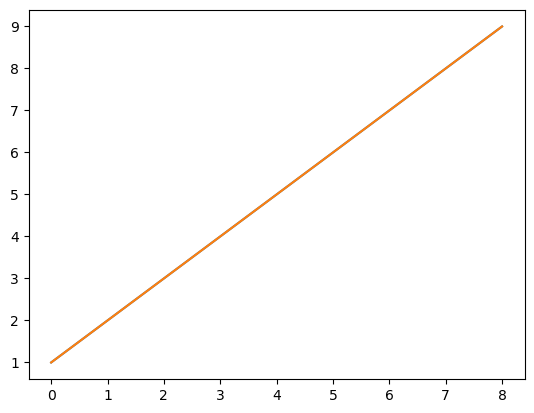

In [61]:
df['A'].plot()
plt.show()

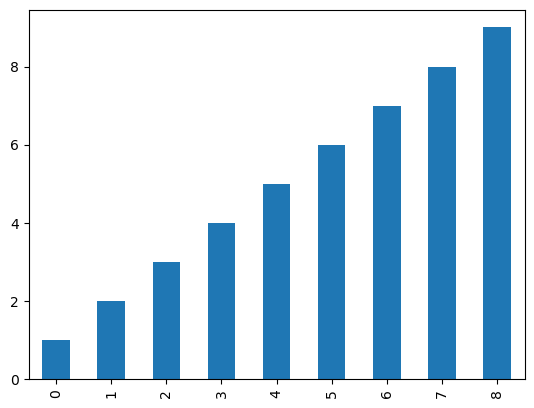

In [63]:
df['A'].plot(kind='bar')
plt.show()

この概要では、Pandasの最も重要な概念を取り上げていますが、このライブラリは非常に豊富で、できることに限界はありません！それでは、この知識を活用して具体的な問題を解決してみましょう。



---

**免責事項**:  
この文書はAI翻訳サービス[Co-op Translator](https://github.com/Azure/co-op-translator)を使用して翻訳されています。正確性を追求しておりますが、自動翻訳には誤りや不正確な部分が含まれる可能性があります。元の言語で記載された文書が正式な情報源とみなされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤解釈について、当社は責任を負いません。
